In [78]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
from skimage import io
import torchvision
import torch

from torch.utils.tensorboard import SummaryWriter


In [37]:
tb_writer = SummaryWriter('tb_writer')

In [90]:
a = np.load("output_correlation.npy")

In [6]:
a_max = np.amax(a, axis = 1)

In [22]:
a_max.shape

(1, 15, 15)

In [27]:
a_max[:,0,0]

array([0.18371049], dtype=float32)

In [13]:
a11 = a[0, :, 0, 0]
a12 = a[0, :, 0, 0]
a55 = a[0, :, 4, 4]
a66 = a[0, :, 5, 5]
a77 = a[0, :, 6, 6]
a88 = a[0, :, 7, 7]
a99 = a[0, :, 8, 8]


In [24]:
a11.shape

(225,)

In [55]:
a11 = np.expand_dims(a[0, :, 0, 0].reshape(15,15), axis = 0)
a11 = a11/a11.max()

a12 = np.expand_dims(a[0, :, 0, 1].reshape(15,15), axis = 0)
a12 = a12/a12.max()

In [80]:
a = torch.empty((2, 1, s, s))

In [84]:
a[0] = torch.from_numpy(a11)
a[1] = torch.from_numpy(a12)

In [88]:
tb_writer.add_image('test', a_grid)

In [74]:
al = [a11, a12]

In [87]:
a_grid = torchvision.utils.make_grid(a, nrow=2)

In [101]:
# Matching layer square size
s = 15

images = torch.empty((s*s, 1, s, s))
k = 0

for i in range(s):
    for j in range(s):
        img = np.expand_dims(a[0, :, i, j].reshape(15,15), axis = 0)
        img = img/img.max()
        images[k] = torch.from_numpy(img)
        k += 1

image_grid = torchvision.utils.make_grid(images, nrow=15)

In [102]:
torchvision.utils.save_image(image_grid, 'grid.png')

In [95]:
tb_writer.add_image('test', image_grid)

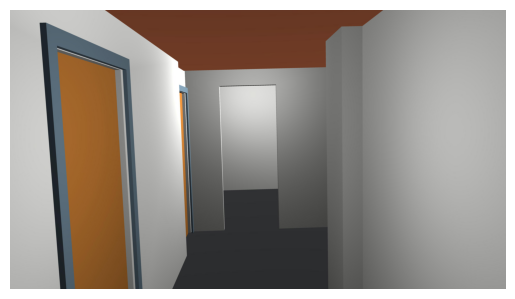

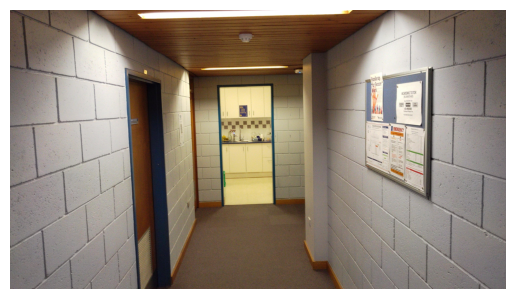

In [11]:
source_image_path = 'datasets/UnimelbCorridor/14_Synthetic_HL2_Untextured/img/snap_012_0001.jpg'
target_image_path = 'datasets/UnimelbCorridor/11_Real5/img/photo_0012.jpg'

source_image = io.imread(source_image_path)
target_image = io.imread(target_image_path)

fig = plt.plot()
plt.imshow(source_image)
plt.axis('off')
plt.show()

fig = plt.plot()
plt.imshow(target_image)
plt.axis('off')
plt.show()